#### Import Required Libraries

In [2]:
import pandas as pd
import numpy as np

#### Read in Automobiles Dataset

In [3]:
df = pd.read_csv("automobiles.csv", index_col=0, na_values=["?"])
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


### Dealing With Missing Values

In [7]:
# Options:
# 1) Check with the data source for actual values
# 2) Drop missing values (if impact of doing so is minimal)
# 3) Replace missing values (ex. mean for continuous and mode for categorical variables)
# 4) Leave values missing (if impact of doing so is minimal)

# Drop rows with missing value for price
df.dropna(subset=["price"], axis=0, inplace = True)

# Replace missing values for normalized losses with average for column
mean = df["normalized-losses"].mean()
df["normalized-losses"].replace(np.nan, mean)

0      122.0
1      122.0
2      122.0
3      164.0
4      164.0
5      122.0
6      158.0
7      122.0
8      158.0
10     192.0
11     192.0
12     188.0
13     188.0
14     122.0
15     122.0
16     122.0
17     122.0
18     121.0
19      98.0
20      81.0
21     118.0
22     118.0
23     118.0
24     148.0
25     148.0
26     148.0
27     148.0
28     110.0
29     145.0
30     137.0
       ...  
175     65.0
176     65.0
177     65.0
178    197.0
179    197.0
180     90.0
181    122.0
182    122.0
183    122.0
184     94.0
185     94.0
186     94.0
187     94.0
188     94.0
189    122.0
190    256.0
191    122.0
192    122.0
193    122.0
194    103.0
195     74.0
196    103.0
197     74.0
198    103.0
199     74.0
200     95.0
201     95.0
202     95.0
203     95.0
204     95.0
Name: normalized-losses, dtype: float64

### Data Formatting

In [8]:
# Convert "mpg" to "L/100km" in automobile dataset

df["city-mpg"] = 235/df["city-mpg"]
df.rename(columns={"city-mpg": "city-L/100km"}, inplace=True)

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,11.190476,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,11.190476,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,12.368421,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,9.791667,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,13.055556,22,17450.0


In [10]:
# Convert data type to integer in column price
df["price"] = df["price"].astype("int")

print(df["price"].head(1))

0    13495
Name: price, dtype: int32


### Data Normalization

In [61]:
# Create sample dataframe for age and income
df_new = pd.DataFrame(np.array([[20, 100000], [30, 20000], [40, 500000]]), columns=('age', 'income'))
df_new.head()

,age,income
0,20,100000
1,30,20000
2,40,500000


In [64]:
df_norm1 = df_new.copy()
df_norm2 = df_new.copy()
df_norm3 = df_new.copy()

# Normalize age and income using simple feature scaling method
df_norm1["age"] = df_new["age"]/df_new["age"].max()
df_norm1["income"] = df_new["income"]/df_new["income"].max()


# Normalize age and income using min-max method
df_norm2["age"] = (df_new["age"]-df_new["age"].min())/(df_new["age"].max()-df_new["age"].min())
df_norm2["income"] = (df_new["income"]-df_new["income"].min())/(df_new["income"].max()-df_new["income"].min())


# Normalize age and income using z-score method
df_norm3["age"] = (df_new["age"]-df_new["age"].mean())/df_new["age"].std()
df_norm3["income"] = (df_new["income"]-df_new["income"].mean())/df_new["income"].std()



print ("Original Data:\n", df_new, "\n")
print ("Feature Scaling:\n", df_norm1, "\n")
print ("Min-Max:\n", df_norm2, "\n")
print ("Z-Score:\n", df_norm3, "\n")

Original Data:
    age  income
0   20  100000
1   30   20000
2   40  500000 

Feature Scaling:
     age  income
0  0.50    0.20
1  0.75    0.04
2  1.00    1.00 

Min-Max:
    age    income
0  0.0  0.166667
1  0.5  0.000000
2  1.0  1.000000 

Z-Score:
    age    income
0 -1.0 -0.414781
1  0.0 -0.725866
2  1.0  1.140647 



### Data Binning

In [32]:
max_price = max(df["price"])
min_price = min(df["price"])

# Create 3 bins for price (low, medium, high)
binwidth = int((max_price-min_price)/3)
bins = range(min_price, max_price, binwidth)

group_names = ["Low", "Medium", "High"]
df['price-binned'] = pd.cut(df["price"], bins, labels=group_names)

df[["price-binned","price"]].head(20)

,price-binned,price
0,Low,13495
1,Low,16500
2,Low,16500
3,Low,13950
4,Low,17450
5,Low,15250
6,Low,17710
7,Medium,18920
8,Medium,23875
10,Low,16430


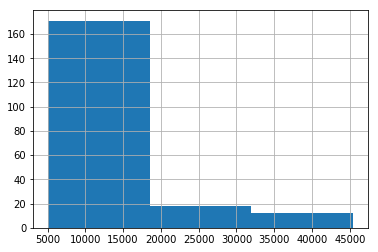

In [38]:
df["price"].hist(bins=3)

### Converting Categorical Variables to Numeric Variables

In [40]:
# Convert fuel-type variable to dummy variables (0 or 1)
pd.get_dummies(df["fuel-type"])

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,0,1
8,0,1
10,0,1
